<a href="https://colab.research.google.com/github/tanmaychikhale/MachineLearning/blob/main/Pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv('Customers.csv')
print(df.head())
print(df.isnull().sum())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [17]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']] = imputer.fit_transform(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])

# Select relevant features for clustering
X = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


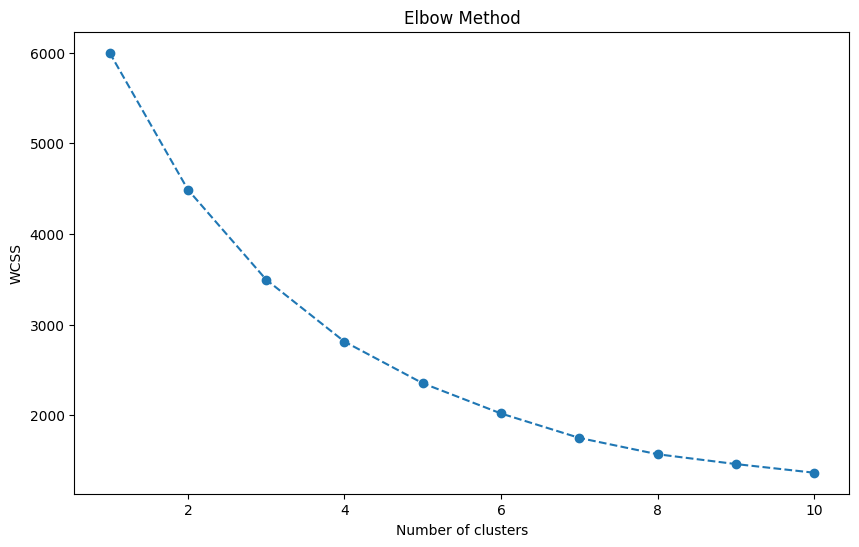

In [19]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [20]:
# Function to plot clusters after dimensionality reduction using PCA
def plot_clusters(n_clusters):
    # Apply KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Apply PCA to reduce dimensions to 2 for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        plt.scatter(X_pca[df['Cluster'] == cluster, 0],
                    X_pca[df['Cluster'] == cluster, 1],
                    label=f'Cluster {cluster + 1}')

    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=300, c='yellow', label='Centroids')
    plt.title(f'Clusters of Customers (n_clusters={n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

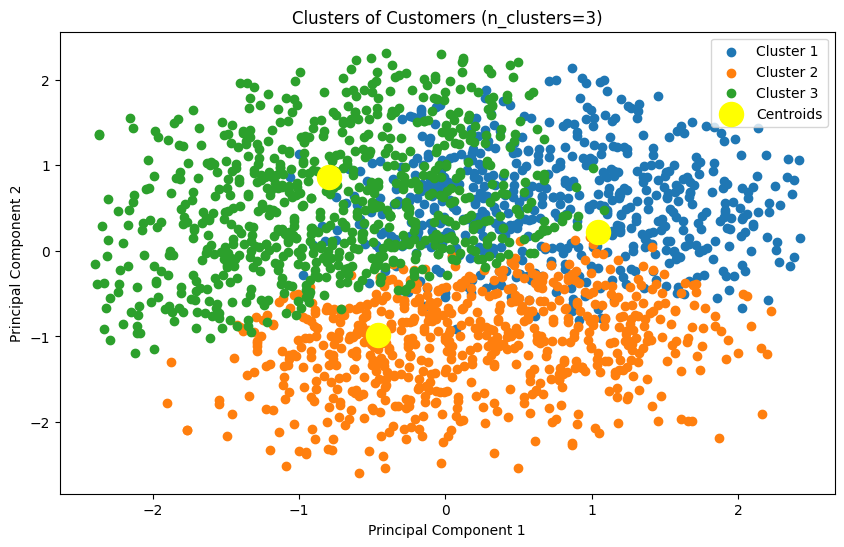

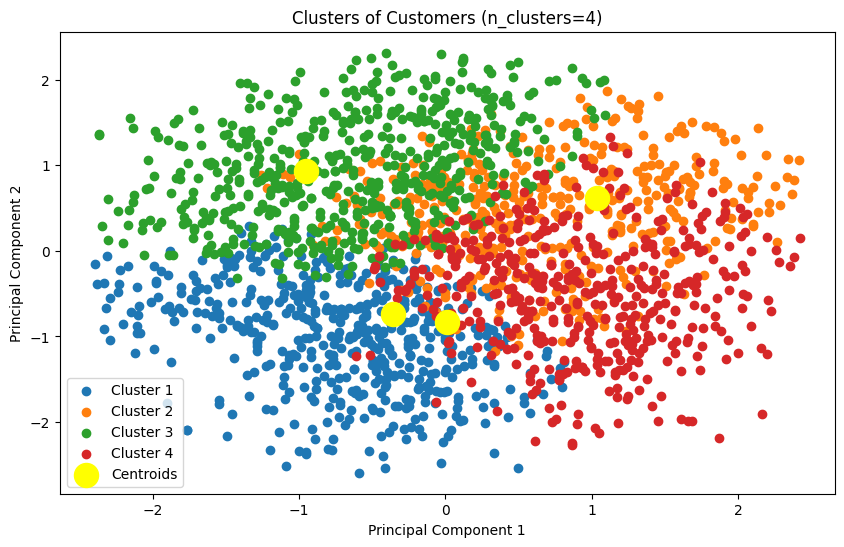

In [21]:
# Plot for 3 clusters
plot_clusters(3)

# Plot for 4 clusters
plot_clusters(4)